In [8]:
import tweepy
#import csv
import numpy as np
import pandas as pd
from textblob import TextBlob
from keras.models import Sequential
from keras.layers import Dense,LSTM
np.random.seed(7)
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#inserting API Keys
consumer_key= 'hAofqWpXdciwT1LMVxhaqhA0i'
consumer_secret= 'XlVsuWm2rcsJWehRJ6BNdzt1zXLWPKaXxG7BVYwt4rplildzyt'
access_token='221064359-AAxNIQTsUCw8vUna5Q6auzMGmQDLwVt7PfbsZXkE'
access_token_secret='38p9UGvyp6sHxNL4R6U8WxHR31fRYZaAukQExyYsbH2We'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [6]:
#searcing company on twitter
public_tweets = api.search('Google', count=100)
#print (public_tweets[2].text)

In [7]:
#Defining a threshold for each sentiment
threshold = 0.5
positive_sentiment_tweet = 0
negative_sentiment_tweet = 0

for tweet in public_tweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment.polarity > threshold:
        positive_sentiment_tweet += 1
    else:
        negative_sentiment_tweet += 1

if positive_sentiment_tweet > negative_sentiment_tweet:
    print("Generally, we have more positive tweets")
else:
    print("Generally, we have more negative tweets")

Generally, we have more negative tweets


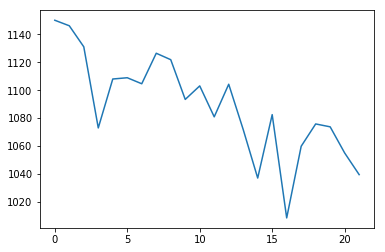

In [9]:
#Data Collation
dates=[]
prices=[]

def get_data(filename):
    df = pd.read_csv(filename)
    date = (df.iloc[:,0]).tolist()
    price = (df.iloc[:,1]).tolist()
    
    for row in date:
        dates.append(int(row.split('-')[-1]))
        
    for row in price:
        prices.append(row)

get_data('GOOG.csv')

plt.plot(prices)
plt.show()

In [19]:
def create_datasets(dates,prices):
    train_size=int(0.80*len(dates))
    train_x,train_y=[],[]
    test_x,test_y=[],[]
    
    centroid=0
    
    for date in dates:
        if centroid < train_size:
            train_x.append(date)
        else:
            test_x.append(date) 
            
    for price in prices:
        if centroid < train_size:
            train_y.append(price)
        else:
            test_y.append(price)
            
    return train_x, train_y, test_x, test_y

def predict_prices(dates, prices, x):
    train_x, train_y, test_x, test_y = create_datasets(dates,prices)

    train_x = np.reshape(train_x, (len(train_x), 1))
    train_y = np.reshape(train_y, (len(train_y), 1))
    test_x = np.reshape(test_x, (len(test_x), 1))
    test_y = np.reshape(test_y, (len(test_y), 1))
    
    model=Sequential()
    model.add(Dense(32, input_dim=1, init='uniform', activation='relu'))
    model.add(Dense(32, input_dim=1, init='uniform', activation='relu'))
    model.add(Dense(16, init='uniform', activation='relu'))
    
    model.add(Dense(1, init='uniform', activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.fit(train_x, train_y, nb_epoch=100, batch_size=3, verbose=1)
    
    prediction = model.predict(np.array([[x,]]))
    print(prediction)

In [20]:
predict_prices(dates,prices,5)

C:\Users\P7554\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, input_dim=1, activation="relu", kernel_initializer="uniform")`
C:\Users\P7554\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, input_dim=1, activation="relu", kernel_initializer="uniform")`
C:\Users\P7554\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
C:\Users\P7554\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
C:\Users\P7554\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: The `nb_epoch` argume

Epoch 1/100
22/22 [==============================] - 1s 28ms/step - loss: 1186892.1761 - acc: 0.0000e+00
Epoch 2/100
22/22 [==============================] - 0s 752us/step - loss: 1186892.2045 - acc: 0.0000e+00
Epoch 3/100
22/22 [==============================] - 0s 770us/step - loss: 1186892.1818 - acc: 0.0000e+00
Epoch 4/100
22/22 [==============================] - 0s 797us/step - loss: 1186892.1818 - acc: 0.0000e+00
Epoch 5/100
22/22 [==============================] - 0s 822us/step - loss: 1186892.1818 - acc: 0.0000e+00
Epoch 6/100
22/22 [==============================] - 0s 615us/step - loss: 1186892.1818 - acc: 0.0000e+00
Epoch 7/100
22/22 [==============================] - 0s 732us/step - loss: 1186892.1705 - acc: 0.0000e+00
Epoch 8/100
22/22 [==============================] - 0s 752us/step - loss: 1186892.1932 - acc: 0.0000e+00
Epoch 9/100
22/22 [==============================] - 0s 779us/step - loss: 1186892.1477 - acc: 0.0000e+00
Epoch 10/100
22/22 [===========================

22/22 [==============================] - 0s 798us/step - loss: 1186892.1761 - acc: 0.0000e+00
Epoch 78/100
22/22 [==============================] - 0s 638us/step - loss: 1186892.1818 - acc: 0.0000e+00
Epoch 79/100
22/22 [==============================] - 0s 775us/step - loss: 1186892.1761 - acc: 0.0000e+00
Epoch 80/100
22/22 [==============================] - 0s 729us/step - loss: 1186892.1591 - acc: 0.0000e+00
Epoch 81/100
22/22 [==============================] - 0s 729us/step - loss: 1186892.1648 - acc: 0.0000e+00
Epoch 82/100
22/22 [==============================] - 0s 798us/step - loss: 1186892.1591 - acc: 0.0000e+00
Epoch 83/100
22/22 [==============================] - 0s 764us/step - loss: 1186892.1591 - acc: 0.0000e+00
Epoch 84/100
22/22 [==============================] - 0s 867us/step - loss: 1186892.1875 - acc: 0.0000e+00
Epoch 85/100
22/22 [==============================] - 0s 797us/step - loss: 1186892.1818 - acc: 0.0000e+00
Epoch 86/100
22/22 [==============================

In [16]:
type(np.array([[3,5]]))

numpy.ndarray